## Hierarhično gručenje

Na predavanjih smo spoznali algoritem <b>hieraričnega gručenja</b>. Njegova glavna značilnost je, da omogoča primerjavo objektov zgolj na podlagi poznavanja <i> mere razdalje </i> med njimi. Predstavitev podatkov torej ni nujno omejena na vektorske prostore.

Algoritem je determinističen in ne predpostavlja števila gruč. Rezultat gručenja bo izračunan naenkrat za vsa možna števila gruč v intervalu $[1, n]$, odločitev o številu pa bo sprejeta po izračunu.



<font color="blue"><b>Razmisli.</b></font> Kakšna je časovna zahtevnost algoritma za hierarhično gručenje? Kako se primerja z metodo K-means?

## Hierarchical clustering

At the lectures we learned the <b>hierarchical clustering</b> algorithm. Its main characteristic is that it allows comparison of objects on the basis of knowledge of <i> distance measures </i> between them. Data representation is therefore not necessarily limited to vector spaces.

The algorithm is deterministic and does not presume the number of clusters. The clustering result will be calculated at once for all possible clustered numbers in the $[1, n]$ interval, and deciding on a number will taken place after the calculation.



<font color="blue"><b>Think.</b></font> What is the time complexity of the algorithm for hierarchical clustering? How does it compare with the K-means method?

In [1]:
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = ['jpg']
import matplotlib
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")

import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

import pandas as pd
import scipy.cluster.hierarchy as sch
import scipy

### Podatki

<img src="slike/živali.jpg"></img> 

Današnji podatki spominjajo na (starejši generaciji dobro znani) album sličic z živalmi. Vsebuje 59 živalskih vrst ter 16 atributov, ki opisuje pripadajoče anatomske značilnosti. Živali so razdeljene v 7 razredov.

### Data

<img src="slike/živali.jpg"></img>

Today's data is reminiscent of (well-known to older generations) an album of animal pictures. It contains 59 animal species and 16 attributes that describe the associated anatomical characteristics. Animals are divided into 7 classes.

In [2]:
data = pd.read_table('podatki/zoo.tab', skiprows=[1,2])
print(data.columns)
data.iloc[:5]

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail',
       'domestic', 'catsize', 'type', 'name'],
      dtype='object')


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type,name
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,mammal,aardvark
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,mammal,antelope
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,fish,bass
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,mammal,boar
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,mammal,calf


Zanimala nas bodo atributi posameznih živali.

We are interested in the attributes of each animal.

In [3]:
X = data.iloc[:,:16]
Y = data.iloc[:,16]
print(X.shape)
X

(59, 16)


,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
5,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0
6,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
7,0,1,1,0,1,0,0,0,1,1,0,0,2,1,1,0
8,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,1,1,0,0,0,0,0,4,0,0,0


Rezultat gručenja dobimo z uporabo modula `scipy.cluster.hierarchy` in metode `linkage`. Slednja izračune povezave v drevesu (dendrogramu) glede na dano mero razdalje (`metric`) in načinom merjenja razdalj med gručami (`method`).

The clustering result is obtained using the `scipy.cluster.hierarchy` module and the `linkage` method. The latter calculates the connection in the tree (dendrogram) with respect to a given distance measure (`metric`) and the method of measuring the distance between clusters (`method`).

In [4]:
L = sch.linkage(X, method="average", metric="cityblock")

Z uporabo funkcije `dendrogram` narišemo drevo in mu priredimo oznake. Funkcija deluje v navezi z že znano knjižnico `matplotlib`.

Using the `dendrogram` function, we draw a tree and organize it with labels. The function works in conjunction with the already known `matplotlib` library.

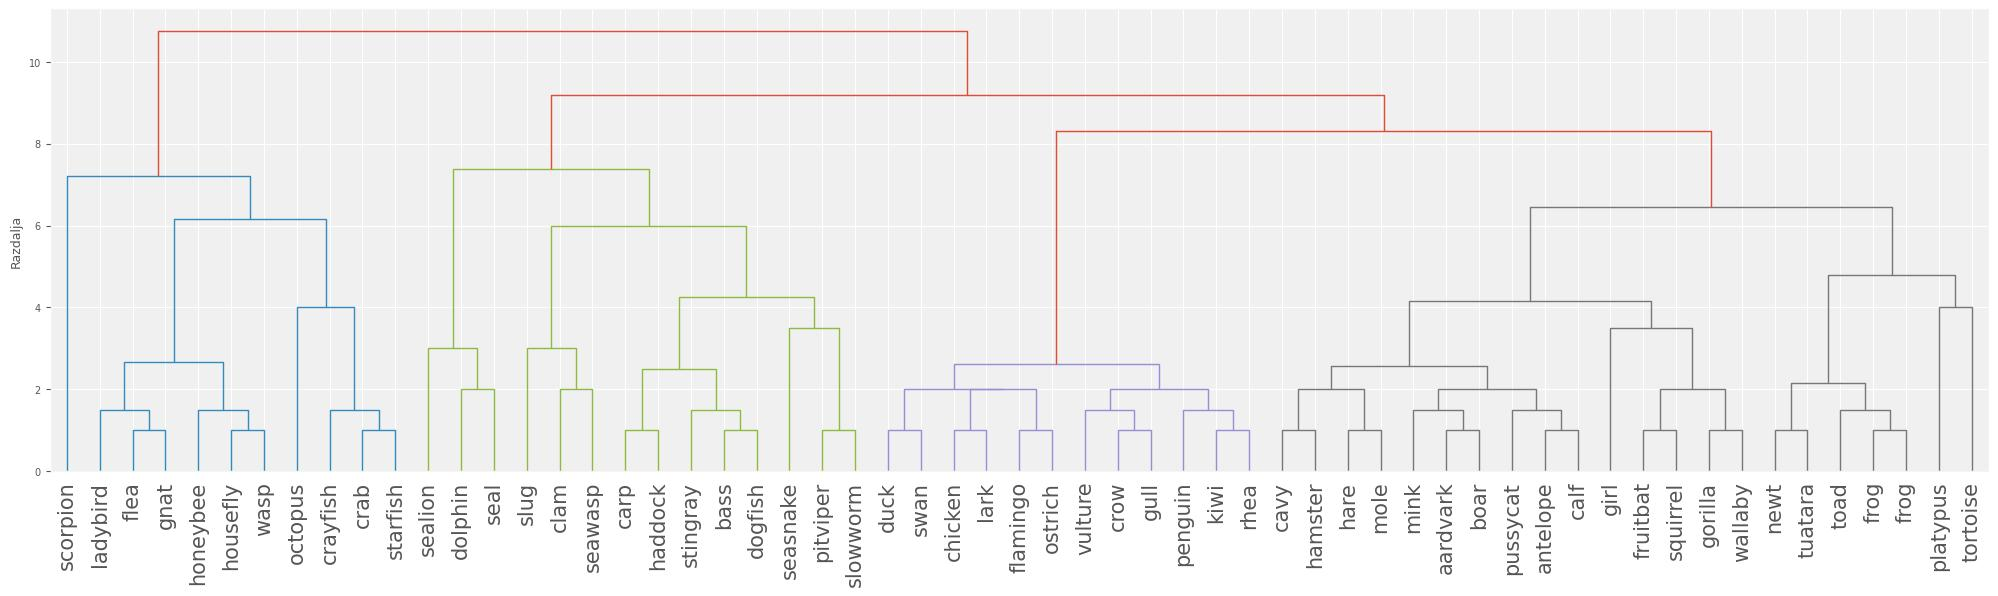

In [5]:
plt.figure(figsize=(25, 6))
labels = data['name'].values
D      = sch.dendrogram(L, labels=labels, leaf_font_size=15)
plt.ylabel("Razdalja")
plt.show()

V redu, za prvi poizkus. Vseeno izgleda dendrogram nekoliko sploščen. Preveri, kako na graf vplivajo različne ...

Okay, for the first try. Nevertheless, the dendrogram seems somewhat flat. Verify how the graph affects various ...

### Metode povezovanja

Metode povezovanja določajo način, kako izračunati razdaljo med dvema poljubno velikima gručama točk.
* <b>Posamično povezovanje</b> (method="single"); Razdalja med gručama je razdalja med najbližjima točkama gruč.
* <b>Povprečna razdalja</b> (method="average"); Povprečna razdalja med vsemi pari točk. 
* <b>Razdalja med središčema</b> (method="centroid"); Izračuna središči gruč v prostoru ter njuno medsebojno razdaljo. Mera razdalje je nujno evklidska.

##### Vprašanje 4-2-1
Preizkusi različne oblike dendrograma glede na izbrano mero razdalje.

### Linkage methods

Linkage methods determine how to calculate the distance between two arbitrarily large points points.

* <b>Single linkage</b> (method = "single"); The distance between the clusters is the distance between the closest points of the clusters.
* <b>Average linkage</b> (method = "average"); The average distance between all pairs of points.
* <b>Centroid linkage</b> (method = "centroid"); Calculates the centers of clusters in the space and their mutual distance. The distance measure is necessarily Euclidean.

##### Question 4-2-1

Test various forms of the dendrogram with respect to the selected distance measure.

In [6]:
# Preizkusi različne načine merjenja razdalje med gručami
L = sch.linkage(X, method="single",)

[Odgovor](204-2.ipynb#Odgovor-4-2-1)

[Answer](204-2.ipynb#Answer-4-2-1)

Ali je evklidska razdalja res najbolj primeren način primerjanja atributov, ki so diskretni? Ne vedno.

Is the Euclidean distance really the best way to compare attributes that are discrete? Not always.

### Mere razdalje

Način določanja interpretacije razdalje med točkama $\vec{x} = (x_1, x_2, ..., x_p)$ in $\vec{y} = (y_1, y_2, ..., y_p)$ vpliva na rezultat hierarhičnega gručenja. Izbira ustrezne mere je odvisna od narave podatkov in čimbolje odgovarja na vprašanje: <i>kaj pomeni, da sta dva primera podobna?</i>

Na izbiro ustrezne mere lahko vplivajo:
* Prisotnost manjkajočih vrednosti
* Predstavitev podatkov (vektorji, nizi znakov, slike, ...)
* Tip atributov in interpretacija vrednosti


Nekaj pogostih mer razdalje:
* Evklidska razdalja <code>(metric="euclidean")</code>

$$ d(\vec{x}, \vec{y}) = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + ... + (x_p - y_p)^2} $$

* Manhattanska razdalja <code>(metric="cityblock")</code>

$$ d(\vec{x}, \vec{y}) = |x_1-y_1| + |x_2 - y_2| + ... + |x_p - y_p| $$

* Kosinusna razdalja <code>(metric="cosine")</code>

<p>Predstavlja <i>kosinus kota</i> med vektorjema $\vec{x}$ in $\vec{y}$ - manjši kot pomeni večjo podobnost. Uporabna za primerjavo podobnosti med vektorji, neupoštevajoč absolutnih velikosti.</p>

$$ d(\vec{x}, \vec{y}) = 1 - \frac{\vec{x} \cdot \vec{y}}{\|\vec{x}\| \|\vec{y}\|} $$

* Jaccardov index <code>(metric="jaccard")</code>

<p>Izmeri delež ujemanj med pari soležnih komponent $(x_i, y_i)$, kjer je vsaj ena izmed vrednosti $x_i$ ali $y_i$ večja od nič. Primerna za uporabo v primerih, ko imamo opravka z manjkajočimi vrednostmi ali diskretnimi atributi.</p>

Popoln spisek razdalj najdeš v <a href="http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.spatial.distance.pdist.html">dokumentaciji</a>.

<br/>
<font color="blue"><b>Razmisli.</b></font> Poizkusi se spomniti vrste podatkov, kjer bi bilo smiselno uporabiti vsako posamezno mero.

###  Distance measures

The method of determining the interpretation of the distance between the points $\vec{x} = (x_1, x_2, ..., x_p)$ and $\vec{y} = (y_1, y_2, ..., y_p)$ affects the result of hierarchical clustering. Choosing the right size depends on the nature of the data and answers the question as much as possible: <i>what does it mean when two examples are similar?</i>

The choice of the appropriate measure may be affected by:

* The presence of missing values
* Data presentation (vectors, character strings, images, ...)
* Attributes type and interpretation of values


Some common distance measures:
* Euclidean distance <code> (metric = "euclidean") </code>

$$ d(\vec{x}, \vec{y}) = \sqrt{(x_1-y_1)^2 + (x_2 - y_2)^2 + ... + (x_p - y_p)^2} $$

* Manhattan distance <code> (metric = "cityblock") </code>

$$ d(\vec{x}, \vec{y}) = |x_1-y_1| + |x_2 - y_2| + ... + |x_p - y_p| $$

* Cosine distance <code> (metric = "cosine") </code>

<p>Represents the <i>cosine of the angle</i> between the $\vec{x}$ and $\vec{y}$ vectors - smaller angle means greater similarity. Useful for comparing the similarities between vectors, disregarding their absolute size.</p>

$$ d(\vec{x}, \vec{y}) = 1 - \frac{\vec{x} \cdot \vec{y}}{\|\vec{x}\| \|\vec{y}\|} $$

* Jaccard index <code> (metric = "jaccard") </code>

<p>Measures the proportion of matches between $(x_i, y_i)$ pairs at the same positions, where at least one of the values $x_i$ or $y_i$ is greater than zero. Suitable for use in cases where we are dealing with missing values or discrete attributes.</p>

Find the complete list of distances in <a href="http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.spatial.distance.pdist.html">documentation</a>.

<br/>
<font color="blue"><b>Think.</b></font> Try to remember the type of data where it would be sensible to use each single measure.

### Določanje števila gruč

### Determining the number of clusters

Koliko gruč je v podatkih? Na to vprašanje je težko odgovoriti in tudi sicer velja za odprto vprašanje na področju storjnega učenja. Vseeno poznamo nekaj kazalcev, ki jih v grobem delimo na 
* <font color="green">nadzorovane</font> (znani so resnični razredi podatkov)
* <font color="blue">nenadzorovane</font> (znane so samo značilke in/ali razdalje med primeri)

How many clusters are in the data? It is difficult to answer this question and it is also considered an open question in the field of machine learning. Nevertheless, we know some of the indicators that we roughly divide on
* <font color="green">supervised</font> (true data classes are known)
* <font color="blue">unsupervised</font> (only the characteristics and/or distance between the examples are known)

Za določitev pripadnosti primerov gručam uporabimo funkcijo `fcluster`. Slednja prejme parameter `t`, ki določa razdaljo pri kateri <i>odsekamo</i> dendrogram, t.j. odstranimo vse povezave, ki so daljše od dane dolžine. Preostale povezane komponente grafa dendrograma tako tvorijo skupine.

To determine the belonging of examples to clusters, we use the `fcluster` function. The latter receives the `t` parameter, which determines the distance at which we <i>cut</i> the dendrogram, i.e. remove all links that are longer than a given length. The remaining related components of the dendrogram graph thus form groups.

In [7]:
L = sch.linkage(X, method="average", metric="cityblock")   
t = 3.5
predictions = sch.fcluster(L, t=t, criterion="distance").ravel()
classes     = data['type'].values   # resnicni razredi 

print("Primer", "Resnični razred", "Gruča")
for name, category, prediction in list(zip(data['name'].values, classes, predictions))[2:10]:
        print("%s\t%s\t%s" % (name, category, prediction))

Primer Resnični razred Gruča
bass	fish	7
boar	mammal	10
calf	mammal	10
carp	fish	7
cavy	mammal	10
chicken	bird	9
clam	invertebrate	6
crab	invertebrate	2


Ponovno narišemo dendrogram in ga <i>odsekamo</i> pri dani razdalji. V nadaljevanju si bomo ogledali številske ocene uspešnosti gručenja.

Re-draw the dendrogram and <i>cut</i> it at the given distance. Below we'll see a number of estimates of clustering performance.

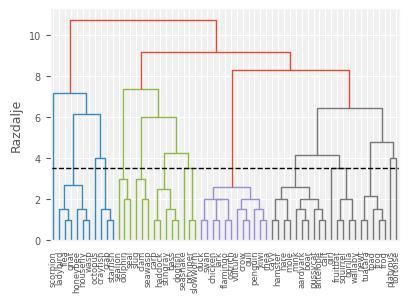

In [8]:
D = sch.dendrogram(L, labels=labels)
plt.plot([0, 1000], [t, t], "k--")
plt.ylabel("Razdalje")
plt.show()

#### Skupna deljena informacija

Mera skupne deljene informacije je uporabna, ko so na voljo informacije o resničnih razredih, v katere spadajo primeri. Pri tem ni odveč poudariti, da resnični razredi ne smejo biti uporabljeni pri deljenju primerov v skupine.

Naključne dodelitve oznak gruč imajo vrednost skupne deljene informacije 
blizu `0.0` za vsako vrednost števila skupin in števila primerov. Popolno ujemanje gruč z obstoječimi razredi ima vrednost `1`.
Mera ni odvisna od predstavitve podatkov, t.j. ni potrebno da so podatki v vektorskem prostoru, saj je odvisna samo od oznak.

#### Common shared information

The measure of common shared information is useful when information on the real classes, which includes examples, is available. It is not unreasonable to emphasize that real classes should not be used in case sharing.

Random assignments of cluster labels have the value of the total shared information
close to `0.0` for each value of the number of groups and number of cases. The complete clustering of clusters with existing classes has a value of `1`.
The measure does not depend on the presentation of data, i.e. it is not necessary to have data in the vector space, as it depends only on labels.

In [9]:
from sklearn.metrics import adjusted_mutual_info_score
score = adjusted_mutual_info_score(classes, predictions)
score

0.7740027756527372

#### Koeficitent silhuete

Koeficient silhuete je nenadzorovana mera v območju med `-1` (napačno dodeljene skupine) in `1` (zelo goste, dobro ločene skupine). Večja notranja gostota znotraj skupin in večja razdalja sta premosorazmeni s koeficientom. Tudi ta mera ne predpostavlja, da so podatki v vektorskem prostoru, je pa odvisna od izbrane mere razdalje.

##### Vprašanje 4-2-2

Preveri, kako se ocena spreminja glede na izbrano mero razdalje. Katera mera razdalje najbolje oceni gručenje? Ali je rezultat smiseln?

#### Silhouette coefficient

The silhouette coefficient is an unsupervised measure in the area between `-1` (wrongly assigned groups) and` 1` (very dense, well-separated groups). The greater internal density within the groups and the greater the distance are proportional with the coefficient. Even this measure does not assume that the data is in the vector space, but it depends on the selected distance.

##### Question 4-2-2

Check how the rating varies according to the selected distance measure. Which measure of distance best estimates clusters? Is the result meaningful?

In [10]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, predictions, metric="cityblock")
score

0.45709905460398886

[Odgovor](204-2.ipynb#Odgovor-4-2-2)

[Answer](204-2.ipynb#Answer-4-2-2)

##### Vprašanje 4-2-3

Izvedi analizo gručenja na podatkih o živalih  tako, da izbereš ustrezno metodo povezovanja, mero razdalje in število gruč. Uporabi eno od predstavljenih mer podobnosti ter poišči tako kombinacijo omenjenih nastavitev, da bo rezultat gručenja karseda visok.

##### Question 4-2-3

Perform a clustering analysis on animal data by selecting the appropriate linking method, distance measure, and number of clusters. Use one of the similarity measures presented and find a combination of the above settings so that the clustering result is as high as possible.

In [11]:
# ...

[Odgovor](204-2.ipynb#Odgovor-4-2-3)

[Answer](204-2.ipynb#Answer-4-2-3)